<a href="https://colab.research.google.com/github/IsabellaGarciaS/Biosignals/blob/main/P3_Parte1_G2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head><p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='black'> <center>
       Bioseñales y Sistemas </center></font></h1>
<p3><center><b><font color='black' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>
<h2><font color='black'> <center>
Practica 3 parte 1  </center></font></h2>
<h3><font color='black'> <center>
Danna Isabella Garcia Saenz - Solanlly Evenedy Montoya Rivera </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1></head>


In [ ]:
#Instalo las librerias necesarias
from scipy.io import loadmat
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from csv import reader as reader_csv;
import scipy.signal as signal;
import pandas as pd
import glob
import math
from scipy.stats import kstest
from scipy.stats import levene
from scipy.stats import mannwhitneyu
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
annots = sio.loadmat('/content/drive/MyDrive/Datos/signals.mat')
#voy a ver las llaves de los archivos
print(annots.keys())
data_filtrada=annots['ECG_filtered']
señal_filtrada = data_filtrada[0]
data=annots['ECG_asRecording'] #
print("Tamaño de la señal ecg\n",np.size(data[0]))

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])
Tamaño de la señal ecg
 30720


**1.Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como:**

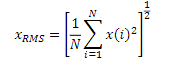


In [ ]:
# hacemos una función para realizar la Xrms
def calcular_rms(signal):
    # Calcular la suma de los cuadrados de los valores
    sum_squared = sum(x**2 for x in signal)

    # Calcular el valor RMS utilizando la fórmula
    rms = math.sqrt(sum_squared / len(signal))
    rms=np.round(rms,3)

    return rms

resultado_rms = calcular_rms(data[0])
print("Valor RMS de la señal:", resultado_rms)



Valor RMS de la señal: 4392.968


Para  este  laboratorio,  se  le  suministra  el  archivo  de  datos  denominado signals.mat,  el  cual  corresponde  al registro de señales ECG y EMG.Las señales se adquirieron a una tasa de muestreo de 1024 Hz.

El registro correspondiente a las señales tal cual se registraron corresponde al campo asRecordingde los archivos entregados. Las señales se sometieron a un proceso de filtrado el cual corresponde al campo filtered.

**1. A  partir  de  la  información  suministrada  en  el archivo.mat,  determine  el  tiempo  de  duración  de las señales, cree un vector de tiempo.**

In [ ]:
#Frecuencia de muestreo
fs=1024;
#Periodo de la señal
T=(1/fs)
#Vamos a tomar la señal ECG tanto para las señales filtradas como las no filtradas
#**Recordemos que la señal sin filtrar se llama data.**
data_filtrada=annots['ECG_filtered']
#Hallamos el tamaño de cada señal
size_data=np.size(data)
size_data_filtrada=np.size(data_filtrada)
#Para encontrar la longitud del tamaño del tiempo se tiene que t=T*size_data
t=(T*size_data)
t2=(T*size_data_filtrada)

#Generamos el vector del tiempo con un np.arange, VF=np.arrange(0,datos.size*T,T)
vec_tiempo=np.arange(0,t,T)
vec_tiempo2=np.arange(0,t2,T)

print("Vector del tiempo para la señal normal\n",vec_tiempo)
print("Vector del tiempo para la señal filtrada\n",vec_tiempo2)

Vector del tiempo para la señal normal
 [0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]
Vector del tiempo para la señal filtrada
 [0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


**2. Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.**

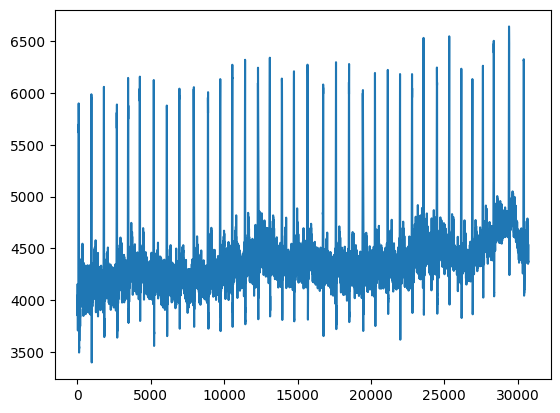

In [ ]:
plt.plot(data[0])
#Graficar en el tiempo

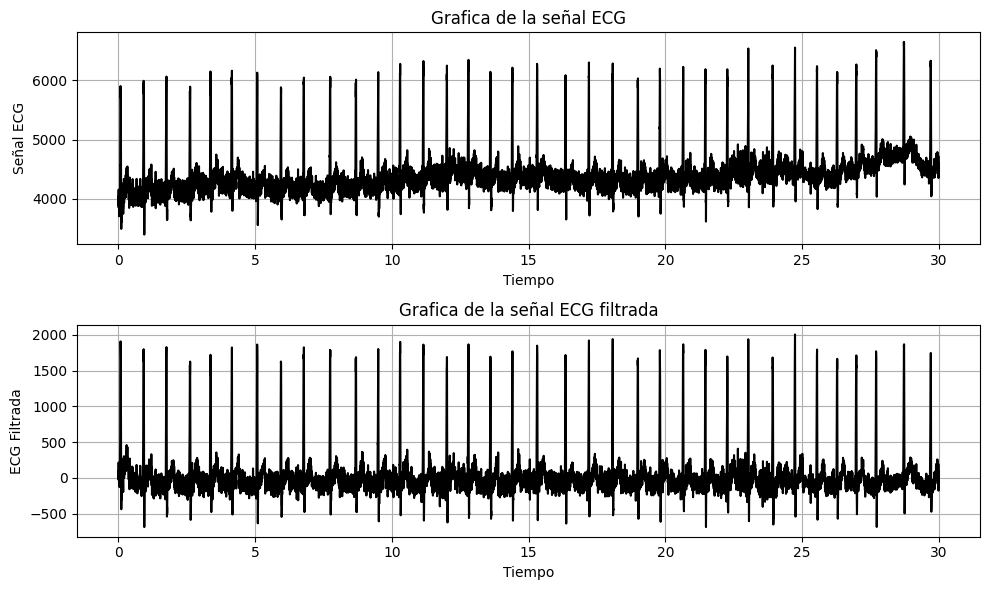

In [ ]:
# Graficar las dos señales
plt.figure(figsize=(10, 6))


plt.subplot(2,1,1)
plt.plot(vec_tiempo,data.T,"k")
plt.title("Grafica de la señal ECG")
plt.xlabel("Tiempo")
plt.ylabel("Señal ECG")
plt.grid()

plt.subplot(2,1,2)
plt.plot(vec_tiempo2,data_filtrada.T,"k")
plt.title("Grafica de la señal ECG filtrada")
plt.xlabel("Tiempo")
plt.ylabel("ECG Filtrada")
plt.grid()

plt.tight_layout()
plt.show()

**Analisis** Debemos tener en cuenta que la adquision de un ECG esta sujeta a la captura de diferentes tipos de señales que modifican el resultado del grafico. En este caso las diferencias entre las señales filtradas y sin filtrar son varias, los offset de la señal filtrada tienen una alineacion sobre el punto 0  que es posible gracias a el uso de filtros digitales, en el caso de el pasa bajas, extrae la componente de baja frecuencia que causa el desplazamiento de la linea base de la señal, asi mismo podemos ver un cambios de las amplitudes de la señal y gracias a filtros pasa altas se permite suavizar ligeramente la curva debido a la interfencia de bajas frecuencias. Debemos recordar que las señales producidas por el cuerpo humano tienen frecuencias bajas.


**3. Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.**


ciclo 1


<ipython-input-8-89058e9e33b8>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  graficar_ciclo(data, int(inicio_c1), int(fin_c1), vec_tiempo)




Promedio: 4126.126
Valor RMS: 4137.075
Varianza: 90477.878
Desviación estándar: 300.795




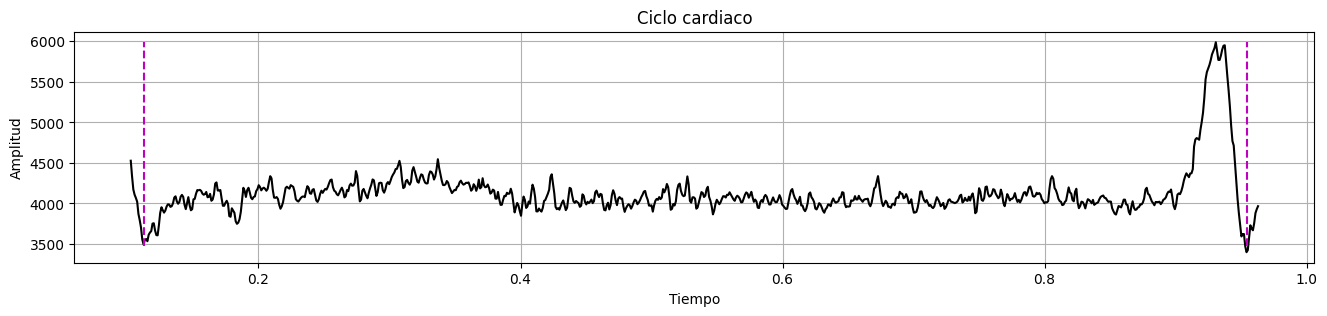

In [ ]:
def calcular_estadisticas_ciclo(ciclo):
    # Calcular promedio
    promedio = np.mean(ciclo)
    promedio=np.round(promedio,3)

    # Calcular valor RMS
    valor_rms = np.sqrt(np.mean(ciclo**2))
    valor_rms=np.round(valor_rms,3)

    # Calcular varianza
    varianza = np.var(ciclo)
    varianza=np.round(varianza,3)

    # Calcular desviación estándar
    desviacion_estandar = np.std(ciclo)
    desviacion_estandar=np.round(desviacion_estandar,3)

    # Mostrar los resultados
    print("\n\nPromedio:", promedio)
    print("Valor RMS:", valor_rms)
    print("Varianza:", varianza)
    print("Desviación estándar:", desviacion_estandar)

def graficar_ciclo(ECG, start, stop, time):
    ciclo = data.T[start:stop].T

    # Graficar el ciclo
    plt.figure(figsize=(16, 3))
    plt.plot(time[start-10:stop+10], data.T[start-10:stop+10], "k")

    # Graficar las líneas de inicio y final
    plt.plot([time[start], time[start]], [int(np.min(ciclo)), np.max(ciclo)], "--m")
    plt.plot([time[stop], time[stop]], [int(np.min(ciclo)), np.max(ciclo)], "--m")

    # Establecer el título y etiquetas
    plt.title("Ciclo cardiaco")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.grid()

    #vamos a sacar los calculos que nos piden
    calcular_estadisticas_ciclo(ciclo)
    print("\n")


# Tomar el inicio y final del primer ciclo
print("\nciclo 1")
inicio_c1, _ = np.where(data.T == np.min(data.T[:500]))
fin_c1, _ = np.where(data.T == np.min(data.T[700:1000]))

# Graficar el primer ciclo
graficar_ciclo(data, int(inicio_c1), int(fin_c1), vec_tiempo)

plt.show()


# **Analisis de resultados**

La media representa el valor promedio de los puntos en el ciclo ECG. En este caso, el promedio es 4126.126, lo que sugiere que, en términos generales, el ciclo tiende a tener valores alrededor de este número.

El valor RMS es una medida que indica la magnitud media de la señal. En este caso, 4137.075 sugiere la "amplitud efectiva" del ciclo ECG, teniendo en cuenta tanto los valores positivos como los negativos.

La varianza mide la dispersión de los valores con respecto a la media. Una varianza alta indica una mayor dispersión. En este caso, 90477.878 sugiere que los valores en el ciclo ECG tienden a variar significativamente con respecto a la media.

La desviación estándar es otra medida de la dispersión de los valores. En este contexto, una desviación estándar de 300.795 indica cuánto tienden a desviarse los valores individuales del promedio. Esto nos indica que los datos son muy dispersos con respecto a la media.

**4. Tome  la  señal  filtrada.  Repita el  procedimiento  anterior con  esta  señal, compare  con  los  resultados obtenidos en el ítem anterior.**


ciclo 1 Señal filtrada


Promedio: 65.041
Valor RMS: 300.167
Varianza: 85869.938
Desviación estándar: 293.036




<ipython-input-9-bfb9ca703269>:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  graficar_ciclo(data_filtrada, int(inicio_c1), int(fin_c1), vec_tiempo2)


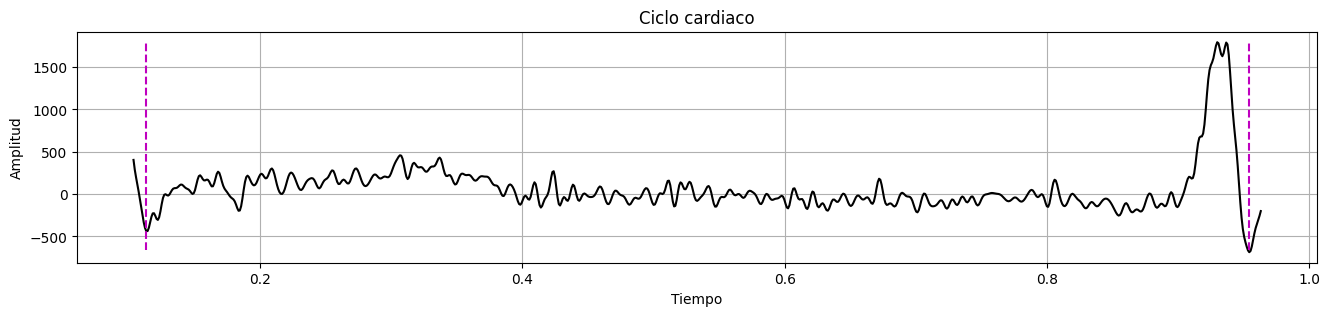

In [ ]:
# Tomar el inicio y final del primer ciclo de para la señal filtrada

def calcular_estadisticas_ciclo(ciclo):
    # Calcular promedio
    promedio = np.mean(ciclo)
    promedio=np.round(promedio,3)

    # Calcular valor RMS
    valor_rms = np.sqrt(np.mean(ciclo**2))
    valor_rms=np.round(valor_rms,3)

    # Calcular varianza
    varianza = np.var(ciclo)
    varianza=np.round(varianza,3)

    # Calcular desviación estándar
    desviacion_estandar = np.std(ciclo)
    desviacion_estandar=np.round(desviacion_estandar,3)

    # Mostrar los resultados
    print("\n\nPromedio:", promedio)
    print("Valor RMS:", valor_rms)
    print("Varianza:", varianza)
    print("Desviación estándar:", desviacion_estandar)

def graficar_ciclo(ECG, start, stop, time):
    ciclo = data_filtrada.T[start:stop].T

    # Graficar el ciclo
    plt.figure(figsize=(16, 3))
    plt.plot(time[start-10:stop+10], data_filtrada.T[start-10:stop+10], "k")

    # Graficar las líneas de inicio y final
    plt.plot([time[start], time[start]], [int(np.min(ciclo)), np.max(ciclo)], "--m")
    plt.plot([time[stop], time[stop]], [int(np.min(ciclo)), np.max(ciclo)], "--m")

    # Establecer el título y etiquetas
    plt.title("Ciclo cardiaco")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.grid()

    #vamos a sacar los calculos que nos piden
    calcular_estadisticas_ciclo(ciclo)
    print("\n")
print("\nciclo 1 Señal filtrada")
inicio_c1, _ = np.where(data_filtrada.T == np.min(data_filtrada.T[:500]))
fin_c1, _ = np.where(data_filtrada.T == np.min(data_filtrada.T[700:1000]))

# Graficar el primer ciclo
graficar_ciclo(data_filtrada, int(inicio_c1), int(fin_c1), vec_tiempo2)


plt.show()

# **Analisis de resultados**


En este caso la actividad eléctrica promedio de 65.041 unidades, por lo que se puede concluir que el promedio es menor cuando la señal es filtrada, que se debe al filtro aplicado.

El valor RMS es de 300.167, que sugiere que la amplitud promedio de la señal ECG en este ciclo es significativa, lo cual podría ser un indicativo de la fuerza con la que se contraen los músculos cardíacos, sin embargo es menor que el de la señal sin filtrar.

Segun la varianza obtenida 85869.938 los valores en el ciclo de la señal ECG siguen variando considerablemente de la media, aunque por un poco menos.
Respecto a la desviación estándar 293.036, indica una mayor variabilidad en la actividad eléctrica cardíaca constante en ambas señales.

**5. Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?**

<ipython-input-10-46d371e6af4f>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(indice_inicio_ciclo[0]), int(indice_final_ciclo[0])



Información del ciclo 1:
  - Valor promedio: 65.04132316737679
  - Varianza: 85869.9381326166

Información del ciclo 2:
  - Valor promedio: -11.626741708631801
  - Varianza: 84929.09169337507

Información del ciclo 3:
  - Valor promedio: -17.205005883522176
  - Varianza: 72639.16642029365

Información del ciclo 4:
  - Valor promedio: 2.1132061318563466
  - Varianza: 82330.48195505924

Información del ciclo 5:
  - Valor promedio: 20.35550802298624
  - Varianza: 91119.86468358377

Información del ciclo 6:
  - Valor promedio: -12.962905545418016
  - Varianza: 79799.45941444024

Información del ciclo 7:
  - Valor promedio: -0.8656738357193463
  - Varianza: 69519.8679511301

Información del ciclo 8:
  - Valor promedio: 5.629692768901215
  - Varianza: 84230.2310357222

Información del ciclo 9:
  - Valor promedio: -6.100573104109037
  - Varianza: 72444.43487141782

Información del ciclo 10:
  - Valor promedio: 3.027448357165044
  - Varianza: 66861.01747529075

Información del ciclo 11:
  - V

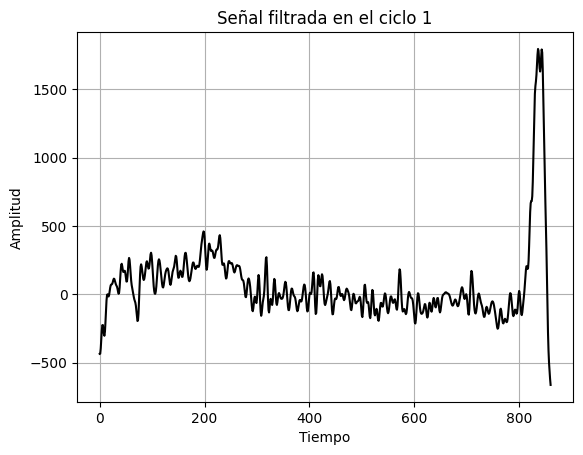

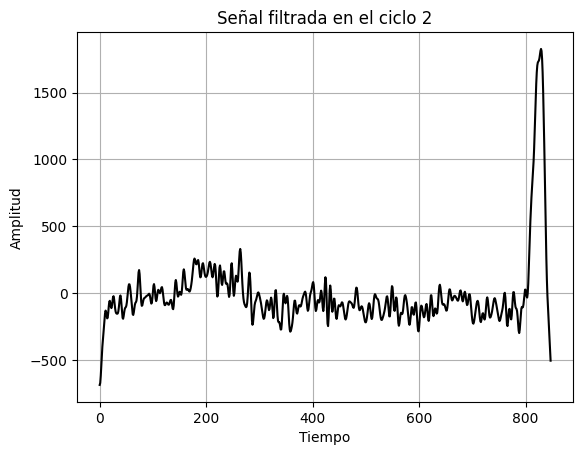

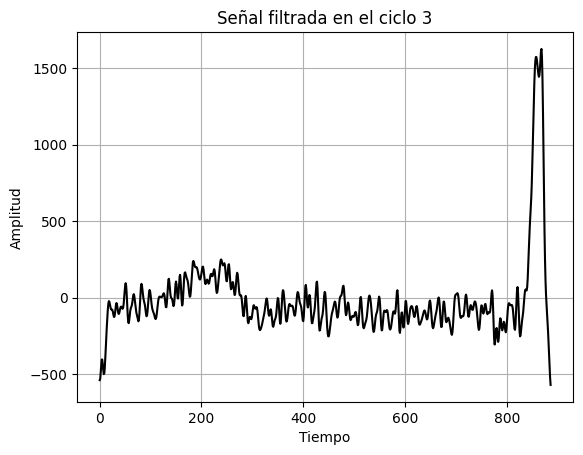

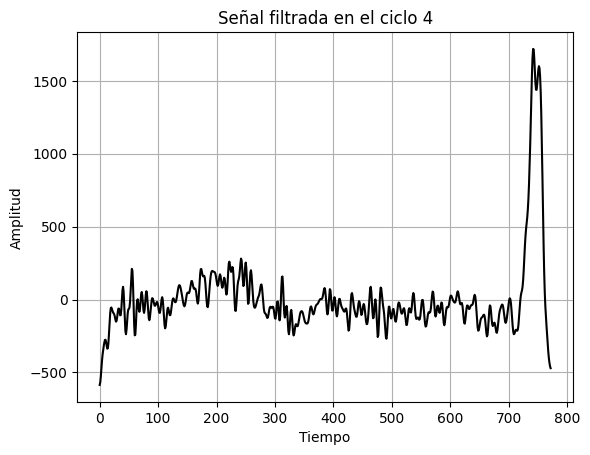

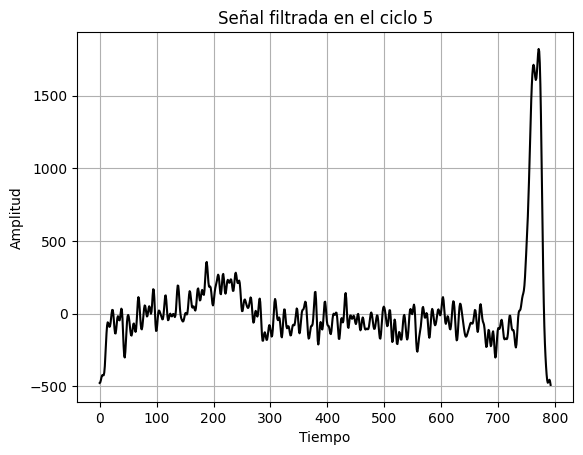

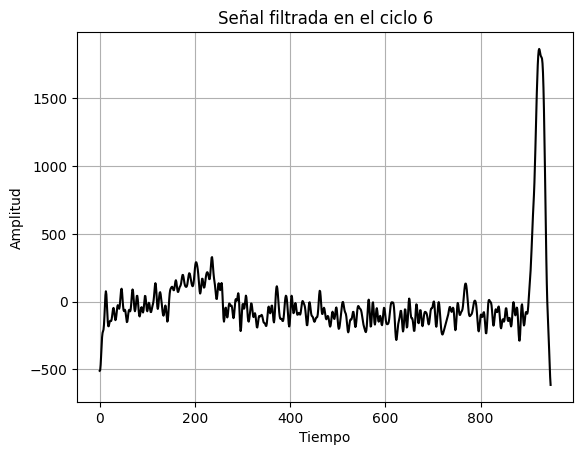

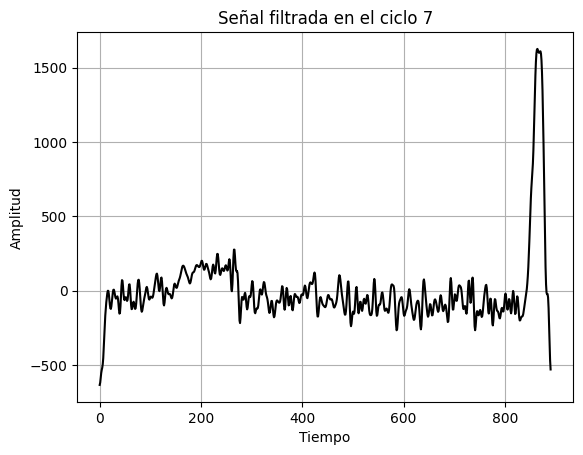

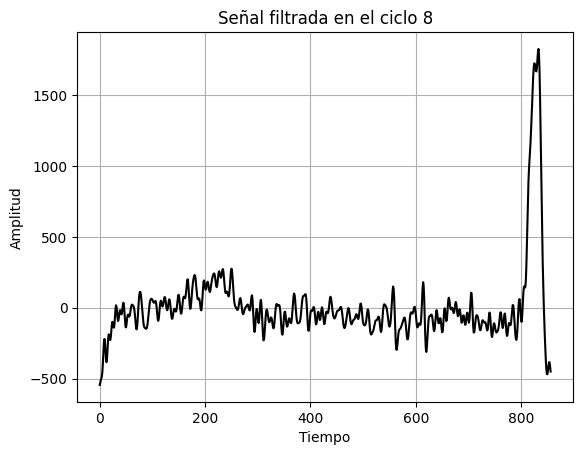

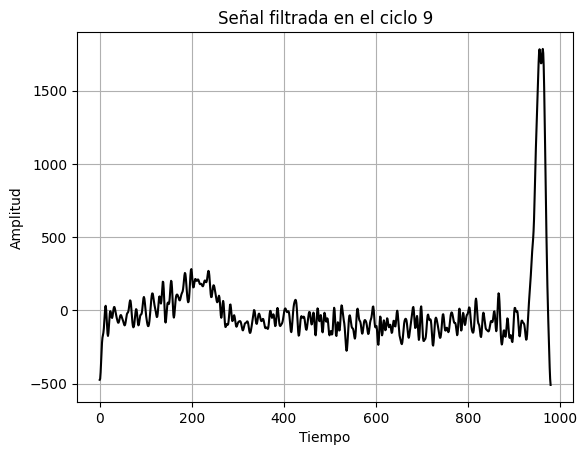

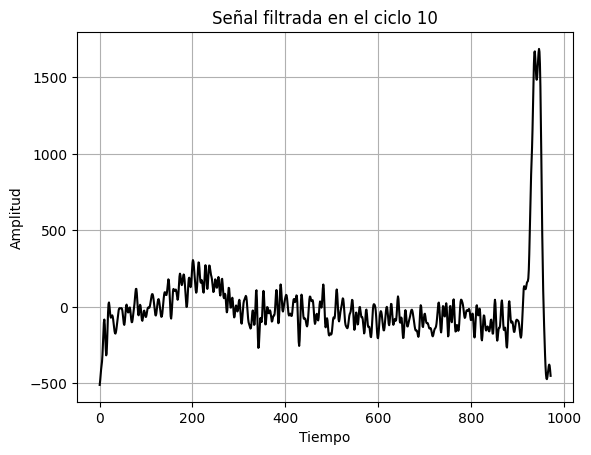

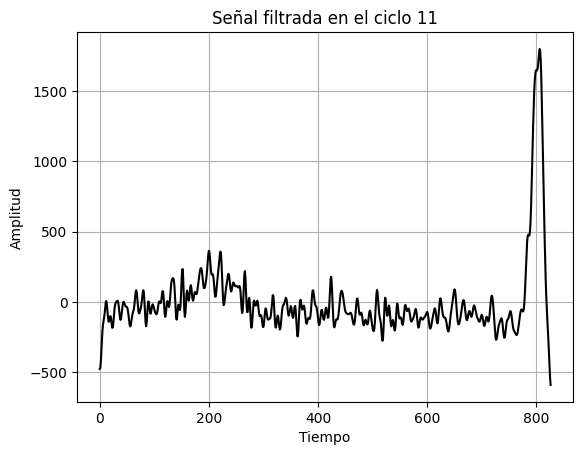

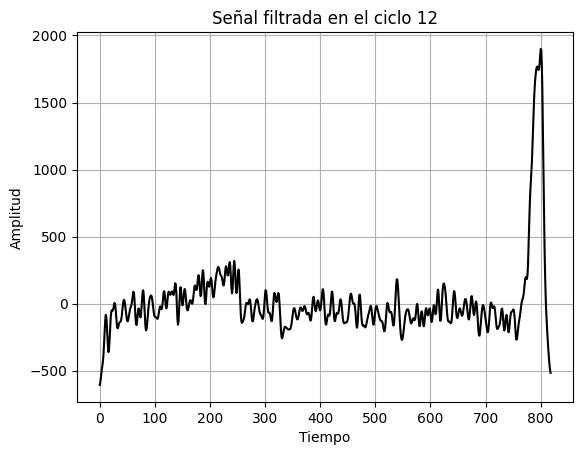

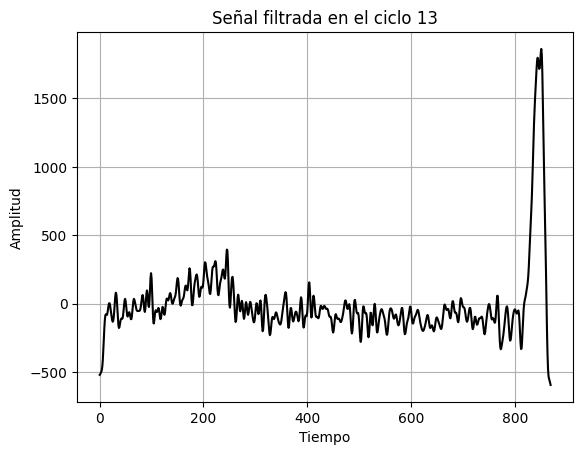

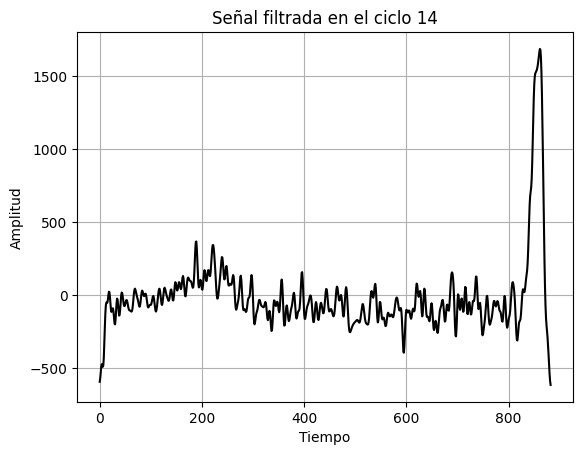

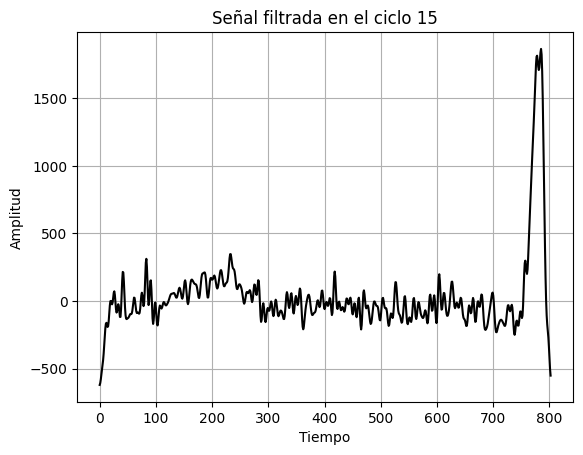

In [ ]:
def encontrar_puntos_ciclo(senal, inicio, final):
    indice_inicio_ciclo = np.where(senal == np.min(senal[inicio:final - 400]))
    indice_final_ciclo = np.where(senal == np.min(senal[inicio + 400:final]))
    return int(indice_inicio_ciclo[0]), int(indice_final_ciclo[0])

def analizar_ciclo(senal, inicio, final, numero_ciclo):
    indice_inicio, indice_final = encontrar_puntos_ciclo(senal, inicio, final)
    #print(f'Ciclo {numero_ciclo} inicia en {indice_inicio} y termina en {indice_final}')

    señal_ciclo = senal[indice_inicio:indice_final]
    plt.figure()
    plt.plot(señal_ciclo, color='black')  # Cambiado el color a negro
    plt.title(f'Señal filtrada en el ciclo {numero_ciclo}')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.grid()

    promedio_ciclo = np.mean(senal[indice_inicio:indice_final])
    varianza_ciclo = np.var(senal[indice_inicio:indice_final])

    # Imprimir con separación
    print(f'\nInformación del ciclo {numero_ciclo}:')
    print(f'  - Valor promedio: {promedio_ciclo}')
    print(f'  - Varianza: {varianza_ciclo}')

    return señal_ciclo

# Definir los intervalos para cada ciclo
intervalos_ciclos = [
    (0, 1000), (900, 1900), (1800, 2800), (2700, 3700), (3400, 4300),
    (4200, 5300), (5100, 6200), (6000, 7100), (6900, 8000), (7800, 9000),
    (8700, 9800), (9700, 10600), (10400, 11500), (11400, 12600), (12300, 13500)
]

# Aplicar la función para los 15 ciclos
ciclos_resultantes = [analizar_ciclo(señal_filtrada, inicio, final, i + 1) for i, (inicio, final) in enumerate(intervalos_ciclos)]

Se tiene que la definición de señal estacionaria es aquella en la cual su frecuencia no cambia con el tiempo, esto nos dice que la frecuencia se encuentra presente en todo instante de tiempo. Como se puede observar en los distintos graficos de las señales, las frecuencias varían entre ellas, por lo que no se puede llegar a concluir que se observa una señal estacionaria. Aparte de eso, tambien se debe de tener el cuenta el tipo de señal que se está observando, la cual es una ECG, una señal fisiologica caracterizada por cambios fuertes relacionadas al sujeto de medición.

**6. Realice  dos  veces  comparaciones  entre  dos  ciclos  cualquiera  utilizando  una  prueba  t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para  determinar  si  existen  diferencias  entre  los  ciclos.  Qué  indica  este  análisis  respecto  de  la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).**

# **Comprobación de los supuestos:**
1. Normalidad (Las muestras deben de tener una distribución normal)
2. Independencia
3. Homocedasticidad (Las varianzas son iguales a lo largo del set de datos.)

**1. Normalidad:** Se utiliza la prueba de Kolmogorov-Smirnov ya que se tienen bastantes datos.

Las hipótesis son:

H0 = Los datos tienen una distribución normal.


H1 = Los datos NO tienen una distribución normal.

Se calculará el valor p y si es mayor a 0.05, entonces se puede asumir con un 95% de certeza que los datos están distribuidos de manera normal

Recordar que si p<alfa Se rechaza la hipótesis nula de normalidad,en caso contrario No se puede rechazar la hipótesis nula de normalidad

In [ ]:
#Se eligen unos ciclos cualquiera, en este caso se va a elegir los ciclos 4, 6, 8 y 0
C4=ciclos_resultantes[3] #clico 4
C6=ciclos_resultantes[5] #clico 6
C8=ciclos_resultantes[7] #clico 8
C10=ciclos_resultantes[9] #clico 10

In [ ]:
#Realizamos la función que me indica si tinen una distribución normal o no
def normalidad(data, cycle_name):
    _, p_value = kstest((data - np.mean(data)) / np.std(data, ddof=1), 'norm')
    print(f"El valor de la normalidad para el ciclo {cycle_name}: {p_value}") #concatenacion del resultado

    if p_value < 0.05:
        print('No tiene una distribución normal\n')
    else:
        print('Sí tiene una distribución normal\n')


# Ciclo 4
normalidad(C4, "4")

# Ciclo 6
normalidad(C6, "6")

# Ciclo 8
normalidad(C8, "8")

# Ciclo 10
normalidad(C10, "10")

El valor de la normalidad para el ciclo 4: 4.059947999213288e-35
No tiene una distribución normal

El valor de la normalidad para el ciclo 6: 3.3089311845949544e-47
No tiene una distribución normal

El valor de la normalidad para el ciclo 8: 7.783860929751261e-44
No tiene una distribución normal

El valor de la normalidad para el ciclo 10: 6.884447577729371e-35
No tiene una distribución normal



Ya que la prueba determina que el valor de p es menor a 0.05 para los ciclos, se rechaza la hipostesis nula dado que los ciclos evaluados no provienen de una distribución normal, por lo tanto se establece que los datos de la señal no presentan normalidad.

La prubea de homocedasticidad nos permite revisar los supuestos.

**2. Independencia:** Se asume por el enunciado que ambas muestras son independientes entre si.

**3. Homocedasticidad:**

In [ ]:
#Se realiza la función que me define la homocedasticidad según levene test
def levene_test(data1, data2, cycle_names):
    _, p_value = levene(data1, data2, center='median')

    if p_value < 0.05:
        estad = "las varianzas no son iguales"
    else:
        estad = "las varianzas son iguales"

    print(f"La prueba para homocedasticidad entre los ciclos {cycle_names} dio un valor de: {p_value}, {estad}\n")


# Ciclos 4 y 6
levene_test(C4, C6, "4 y 6")

# Ciclos 8 y 10
levene_test(C8, C10, "8 y 10")

La prueba para homocedasticidad entre los ciclos 4 y 6 dio un valor de: 0.37782607871337315, las varianzas son iguales

La prueba para homocedasticidad entre los ciclos 8 y 10 dio un valor de: 0.4537583658179032, las varianzas son iguales



A pesar de que los ciclos 4 y 6 y los ciclos 8 y 10 presentan homocedasticidad, no se puede realizar una prueba parametrica debido a que no cumplen con el supuesto de normalidad .

**Prueba t**

Dado que uno de los supuestos necesarios no se cumple, se procede a realizar la prueba de U de Mann-Whitney.

**Prueba de U de Mann-Whitney**
Para realizar este análisis no paramétrico se parte de:

* Hipótesis nula(H0): Las muestras provienen de la misma distribución.

* Hipótesis alternativa(H1): Las muestras no provienen de la misma distribución.

Si el valor p está por debajo del nivel de significancia, es decir 0.05, entonces la prueba dice que hay suficiente evidencia para rechazar la hipótesis nula y que las muestras probablemente se extrajeron de poblaciones con diferentes distribuciones.

In [ ]:
def mannwhitneyu_test(data1, data2, cycle_names):
    result = mannwhitneyu(data1, data2)
    print(f'La prueba U de Mann-Whitney para los ciclos {cycle_names} tiene como resultado p = {result.pvalue}\n')

# Ciclos 4 y 6
mannwhitneyu_test(C4, C6, "4 y 6")

# Ciclos 8 y 10
mannwhitneyu_test(C8, C10, "8 y 10")

La prueba U de Mann-Whitney para los ciclos 4 y 6 tiene como resultado p = 0.002654662628160344

La prueba U de Mann-Whitney para los ciclos 8 y 10 tiene como resultado p = 0.4515388582569285



Estos resultados llevan al rechazo de la hipótesis nula, indicando que las distribuciones de las muestras no son similares y, por lo tanto, la media muestra variaciones. En consecuencia, se puede deducir que la señal es no estacionaria.

**7. Compruebe   los   resultados   anteriores   aplicando   una   prueba   de   Dickey-Fuller   a   la   señal (Estacionariedad)**

In [ ]:
# Aplicamos la función que contiene la prueba de Dickey-Fuller a la señal sin filtrar
resultado_sin_filtrar = adfuller(np.squeeze(data))
print('Para la señal sin filtrar se tiene:')
print(resultado_sin_filtrar)

# Aplicamos la función que contiene la prueba de Dickey-Fuller a la señal filtrada
resultado_filtrada = adfuller(np.squeeze(data_filtrada))
print('Para la señal filtrada se tiene:')
print(resultado_filtrada)

Para la señal sin filtrar se tiene:
(-16.443181171303227, 2.417002721553081e-29, 51, 30668, {'1%': -3.4305632466228713, '5%': -2.8616342493185662, '10%': -2.5668201660230157}, 321415.48849438573)
Para la señal filtrada se tiene:
(-0.6546593807809804, 0.8581469379838581, 20, 30699, {'1%': -3.430563031267381, '5%': -2.8616341541406003, '10%': -2.5668201153621077}, -617120.0626273897)


Para la señal sin filtrar, el estadístico de prueba es muy negativo y el valor p es extremadamente bajo (cercano a cero) 2.417e-29,  Por lo tanto, se puede rechazar la hipótesis nula y concluir que la señal sin filtrar no es estacionaria.

Para la señal filtrada, el valor p es alto (0.858), lo que sugiere que no hay suficiente evidencia para rechazar la hipótesis nula y no se puede concluir que la señal filtrada sea estacionaria, comprobando los resultados obtenidos anteriormente.





# **Conclusiones**

- No se puede realizar una prueba t para comparar los ciclos porque no se cumple el supuesto de normalidad. La prueba t es una prueba paramétrica, lo que significa que se basa en el supuesto de que los datos provienen de una distribución normal. Si este supuesto no se cumple, los resultados de la prueba t no son confiables.

- A pesar de que las pruebas de homocedasticidad indicaron que los grupos en ambos casos eran homocedásticos (con varianza constante), la prueba U de Mann-Whitney determinó que los grupos eran diferentes en ambos casos, si bien los grupos tenían la misma varianza, sus medianas eran diferentes.

- La prueba de Dickey Fuller permite confirmar las pruebas anteriores indicando que la señal es no estacionaria, debido a la falta de evidencia estadística para rechazar la hipótesis nula.

# **Referencias**
[1] Digital Signal Processing Fourth Edition. John G. Proakis, Dimitris G Manolakis. Obtenido de: https://www.srecwarangal.ac.in/ece-downloads/Digital_Signal_Processing___Proakis_and_Manolakis.pdf
